In [66]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import math
import matplotlib.pyplot as plt
from word2number import w2n
import seaborn as sns

In [68]:
df = pd.read_csv('hiring.csv')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [69]:
median = math.floor( df['test_score(out of 10)'].median())
median

8

In [70]:
df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(median)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [71]:
df.experience = df.experience.fillna('zero')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [72]:
df.experience = df.experience.apply(w2n.word_to_num)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [73]:
reg = linear_model.LinearRegression()
reg.fit(df[['experience','test_score(out of 10)','interview_score(out of 10)']],df['salary($)'])

LinearRegression()

In [35]:
reg.coef_

array([2812.95487627, 1845.70596798, 2205.24017467])

In [36]:
reg.intercept_

np.float64(17737.263464337688)

In [37]:
2*2812.95487627+9*1845.70596798+6*2205.24017467+17737.263464337688

53205.96797671769

In [61]:
reg.predict([[2,9,6]])

c:\Users\mauch\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53205.96797671])

In [43]:
reg.predict([[12,10,10]])

c:\Users\mauch\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92002.18340611])

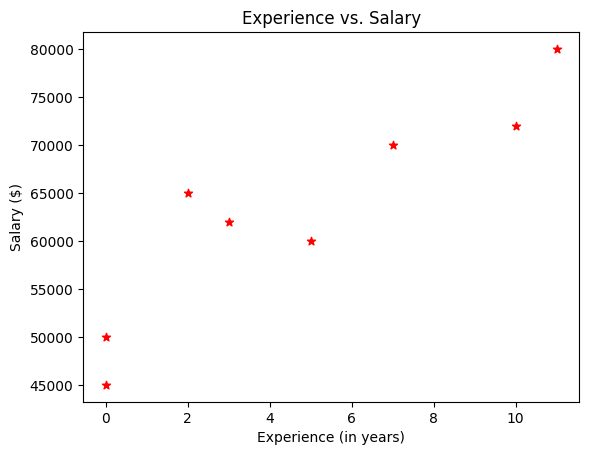

In [75]:
plt.title('Experience vs. Salary')
plt.xlabel('Experience (in years)')
plt.ylabel('Salary ($)')
plt.scatter(df['experience'], df['salary($)'], color='red', marker='*')
plt.show()

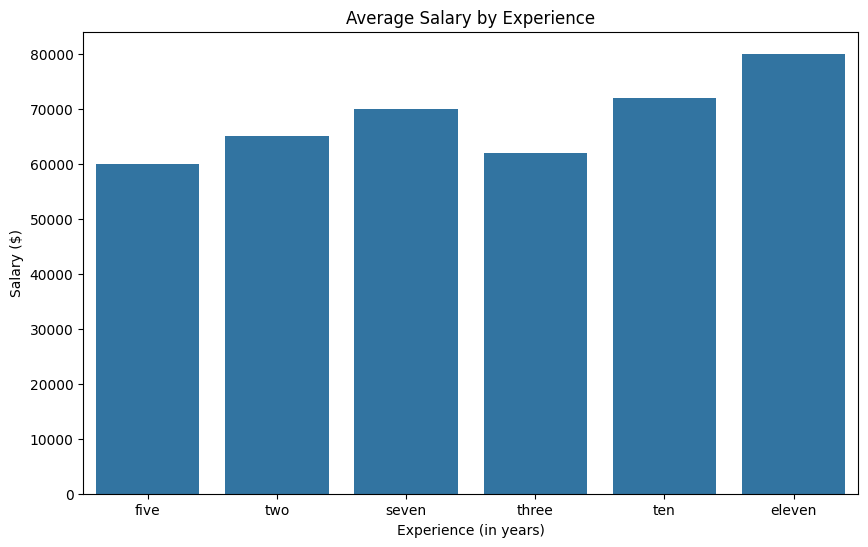

In [51]:
plt.figure(figsize=(10, 6))
sns.barplot(x='experience', y='salary($)', data=df)
plt.title('Average Salary by Experience')
plt.xlabel('Experience (in years)')
plt.ylabel('Salary ($)')
plt.show()


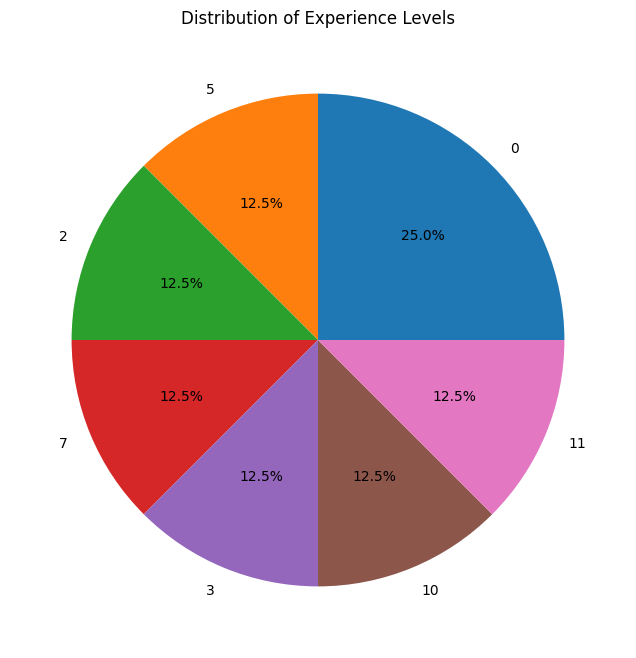

In [85]:
experience_counts = df['experience'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(experience_counts, labels=experience_counts.index, autopct='%1.1f%%', startangle=0)
plt.title('Distribution of Experience Levels')
plt.show()